### Exploratory Data Analysis

This file contains all data exploration,univariate, bivariate analysis, insights and patterns. 

Import all necessary packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [7]:
#importing the dataset
data = pd.read_csv('../data/bank-additional-full.csv', sep=";")

In [20]:
#creating a copy of the original
data_copy = data.copy()

In [3]:
data.shape
#the dataset has 41188 rows and 21 columns

(41188, 21)

In [4]:
#displaying first five rows
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#checking for missing values
data.isnull().sum()
#there are no missing values in dataset

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Univariate Analysis

#### The Target Variable y is a categorical variable

In [7]:
#the frequency table
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Text(0.5, 1.0, 'Distribution of Target')

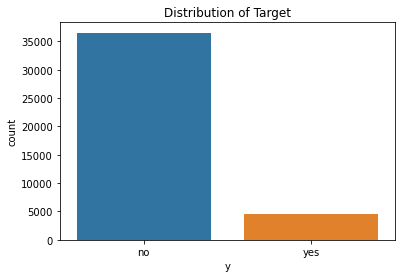

In [8]:
sns.countplot(x='y', data=data)
plt.savefig('class.png', dpi=300)
plt.title('Distribution of Target')

88% of clients did not subscribe to a term deposit which provides a class imbalance problem 

The class imbalance in this case is the number of clients that did not subscribe to a term deposit is more than those that subscribe to a term deposit. 

Predictive models developed using conventional machine learning algorithms could be biased and inaccurate if imbalanced datasets are used. This happens because Machine Learning Algorithms are usually designed to improve accuracy by reducing the error. Thus, they do not take into account the class distribution / proportion or balance of classes.

Two major techniques for dealing with imbalanced data include:

1. Data Level Approach: Resampling techniques Dealing entails strategies such as improving classification algorithms or balancing classes in the training data (data preprocessing) before providing the data as input to the machine learning algorithm.  The main objective is to obtain approximately the same number of instances for both the classes. 


2. Algorithm Ensemble Techniques which involve constructing several two stage classifiers from the original data and then aggregate their predictions.

In [33]:
data['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

#### The Categorical Variables

In [10]:
#getting the categorical variables
categorical_features = data.select_dtypes(include=[np.object])
categorical_feature=[x for x in categorical_features.columns if x not in ['y']]
categorical_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


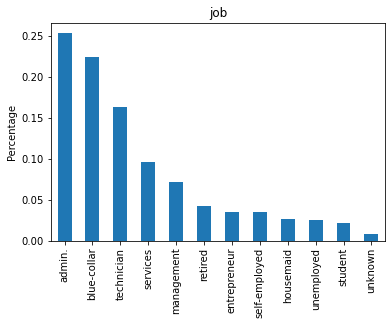

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


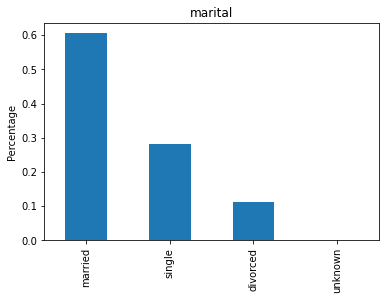

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


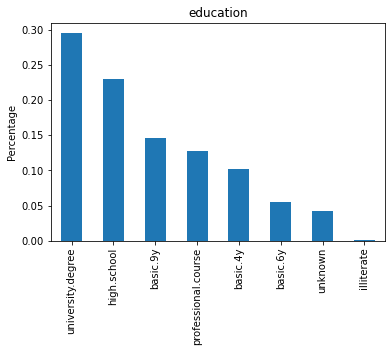

default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


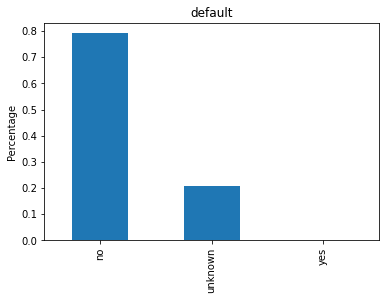

housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


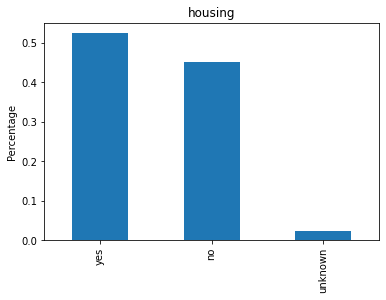

loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


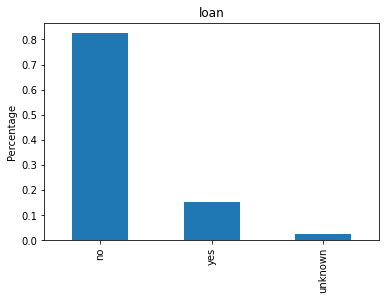

contact
cellular     26144
telephone    15044
Name: contact, dtype: int64


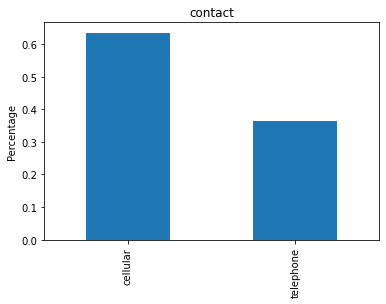

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


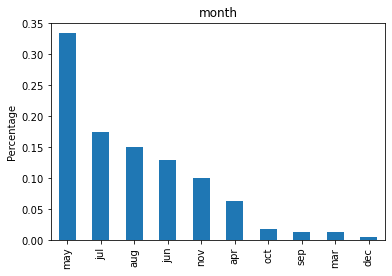

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


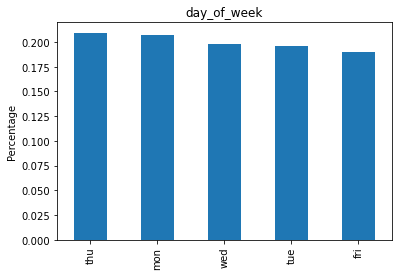

poutcome
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


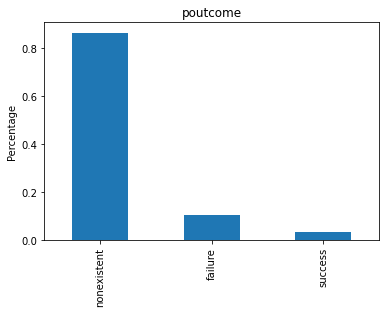

In [13]:
#plotting the categorical variable with a proportion bar chart
for feature in categorical_feature:
    print(feature)
    print(data[feature].value_counts())
    data[feature].value_counts(normalize=True).plot.bar(title=feature)
    plt.ylabel("Percentage")
    plt.show()
   

#### Insights

Job - 25% of clients hold admin jobs, blue-collar and technician jobs are common too.

Marital Status - 60% of clients are married 

Education - 29% of clients have a university degree, and most have some level of education. 

Default - Almost 80% of clients do not have credit in default. 

Housing - About 52% of clients have an housing loan

Loan - 80% of clients do not have a personal loan

Contact - About 60% of clients were last contacted through cellular means

Month - Most of the clients(34%) were last contacted in the month of May

Day of Week - Most of the clients were contacted on Thursdays and Mondays

Poutcome - More than 80% of clients in this campaign were not part of the previously held campaign





#### Numerical variables

In [15]:
#getting the numerical variables
numerics = ['int64', 'float64']

newdf = data.select_dtypes(include=numerics)
numerical_feature = newdf.columns
#numerical_feature=[x for x in newdf.columns if x not in ['Credit_History']]
numerical_feature

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

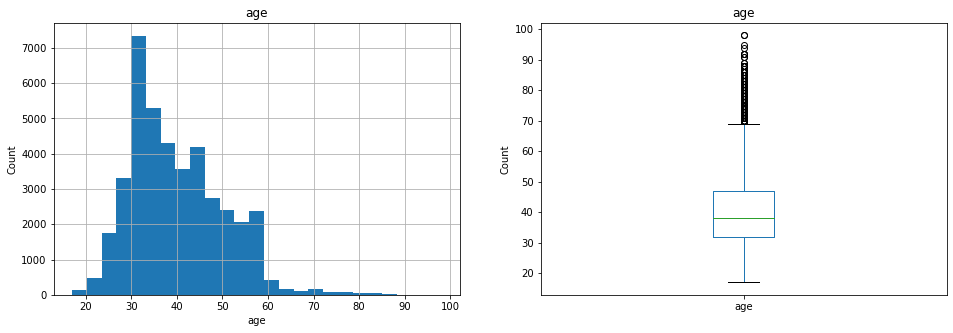

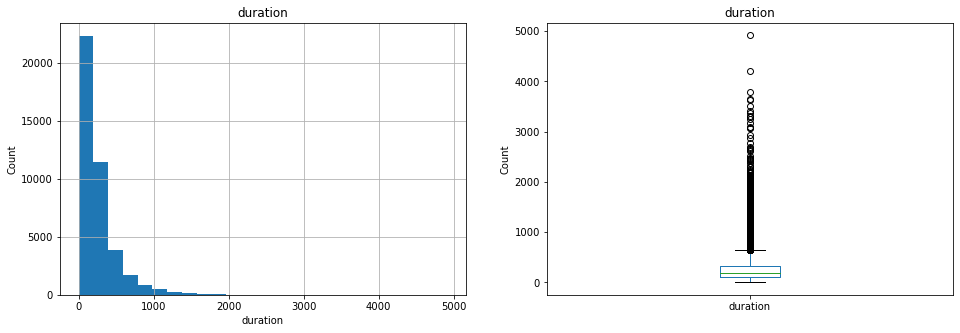

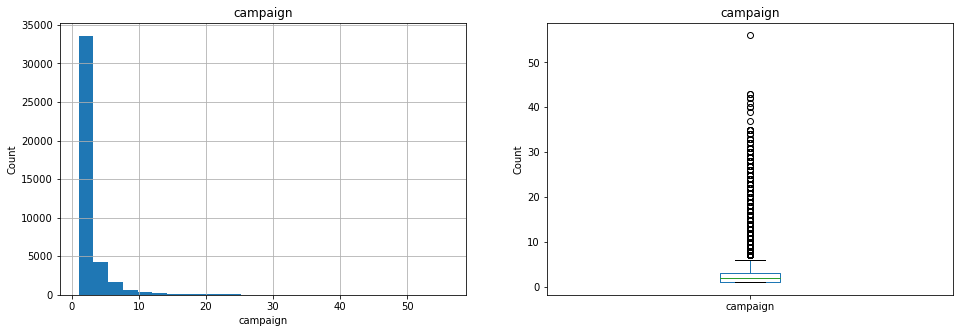

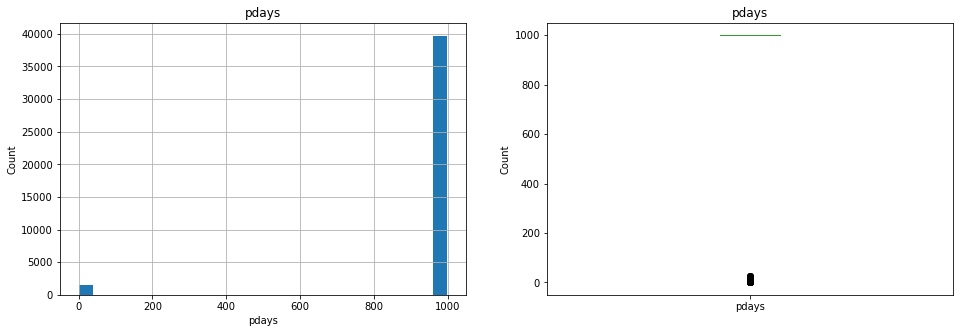

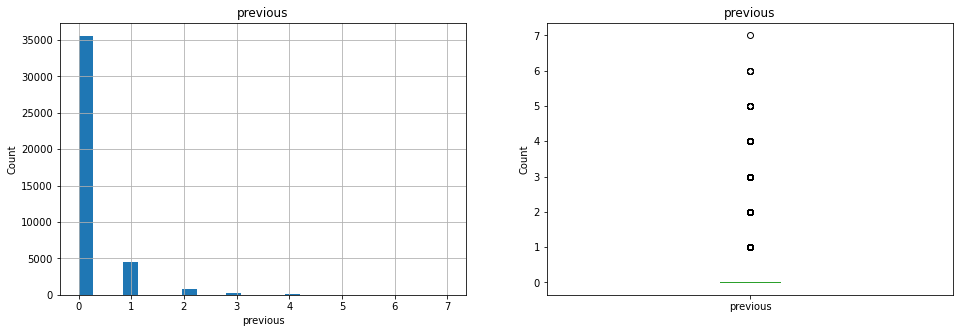

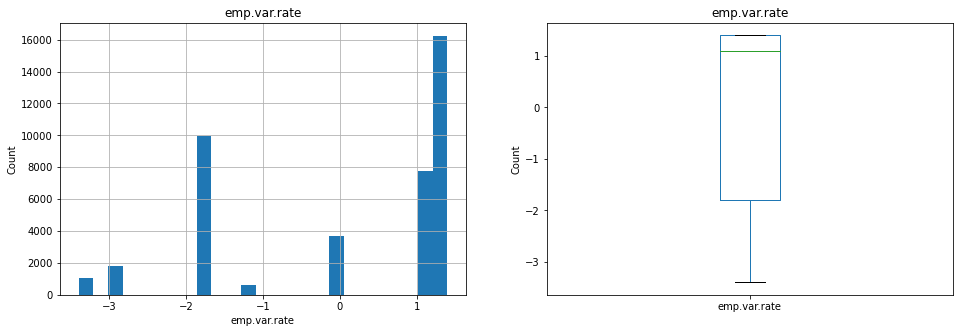

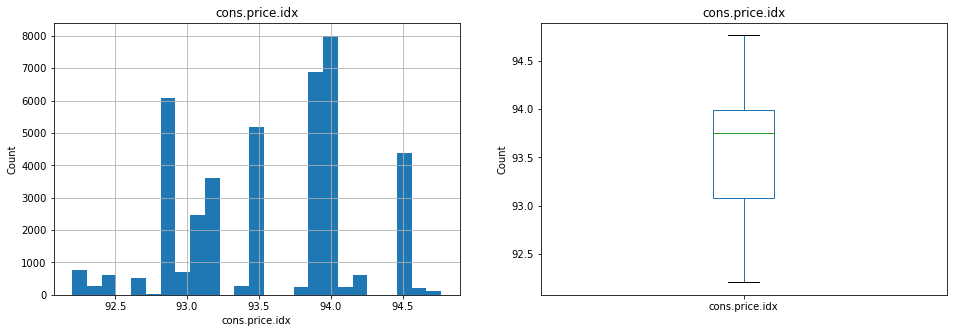

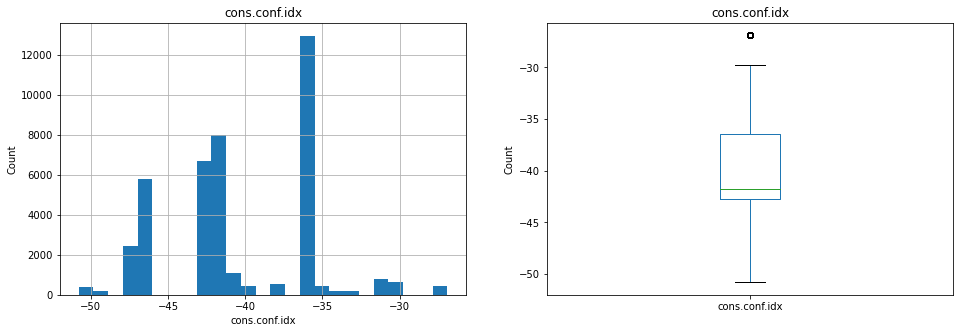

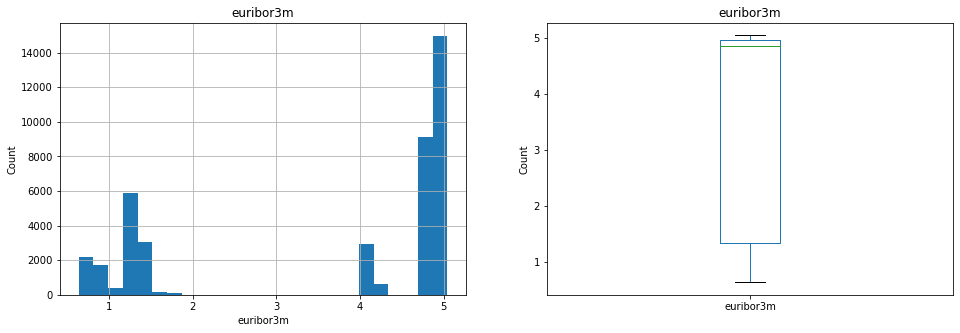

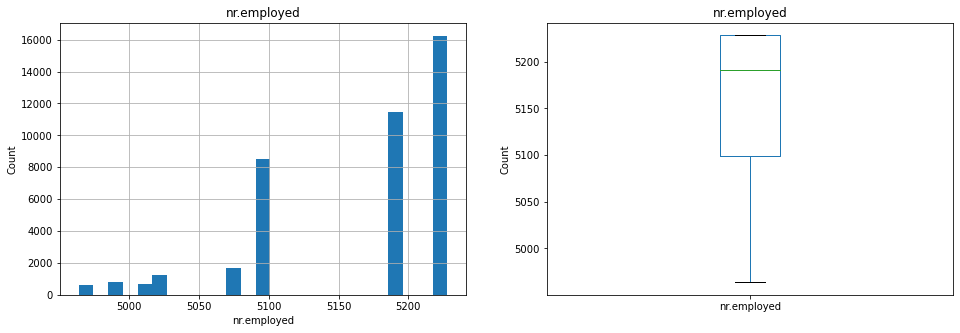

In [17]:
#plotting the numerical variables with an histogram and a boxplot
for feature in numerical_feature:
    plt.figure(1)
    plt.subplot(121)
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.subplot(122)
    data[feature].plot.box(figsize=(16,5))
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [18]:
#getting brief statistics on the numerical columns
data.select_dtypes(include=["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


#### Insights


Age - The age of clients distribution is fairly normal and contains outliers, the mode is around 35 years. 

Duration - The last contact duration in seconds,the distribution contains alot of outliers and is right skewed. 

Campaign - The number of contacts for this client during this campaign. The distribution is right skewed and contains outliers. 

Pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m  and nr.employed are all continous variables and do not contain outliers. 

### Bivariate Analysis


#### Categorical Variables and Target y

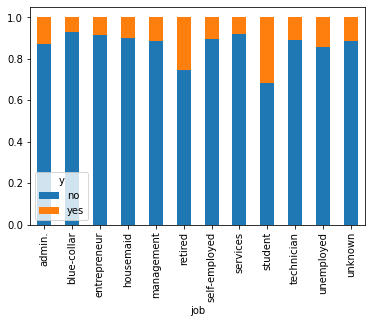

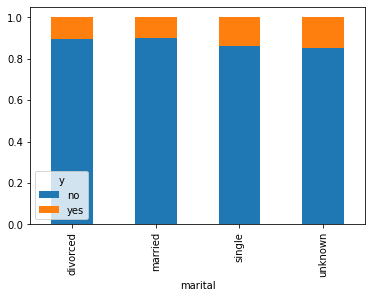

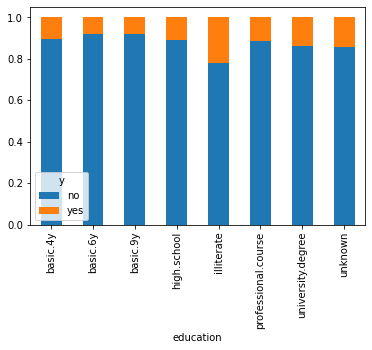

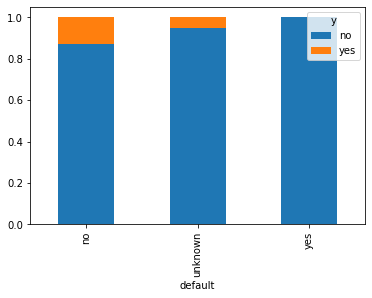

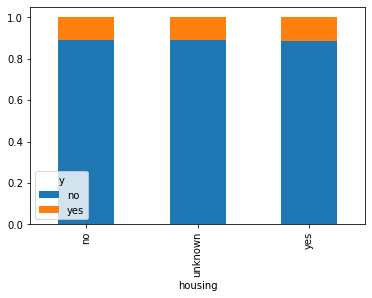

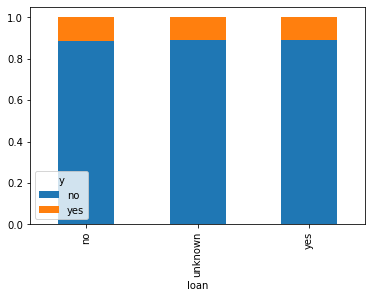

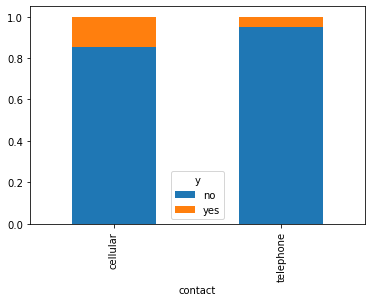

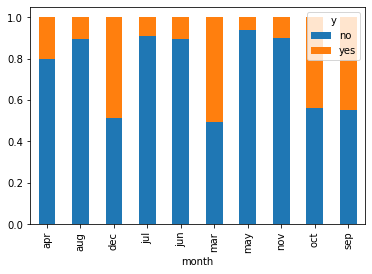

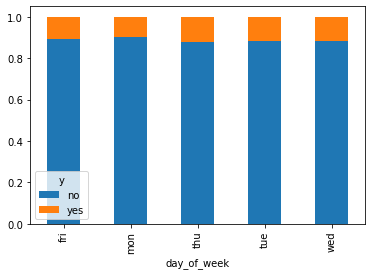

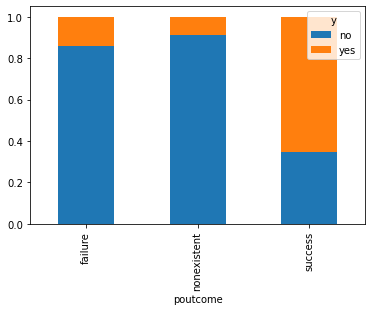

In [19]:
#checks the proportion for variable the number of clients that subscribe to term deposits
for feature in categorical_feature:
    features = pd.crosstab(data[feature], data['y'])
    features.div(features.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.show()

#### Insights

Job- Students and the retired group compared to other categories subscribed to a term deposit

Marital - Single clients compared to other categories subscribed to the term deposits. 

Education - the illiterate group of clients subscribed to term deposits compared to other groups. 

Default - Clients with credit default did not subscribe to term deposits

Housing - The proportion of clients with housing loans who subscribed to the term deposits is the same with those without housing loans

Loans  - The proportion of clients with personal loans who subscribed to the term deposits is the same with those without personal loans

Contact - Clients contain via cellular comunication have a higher chance of subscribing to the term deposits

Month - Clients contacted in March, December, October and September subscribed more compared to other months. 

Day of week - The proportion of clients who subscribed and did not subscribe to the term deposits is the same across the days of the week

Poutcome - Clients who had previously subscribed in a previous marketing campaign had a higher chance of subscribing for a term deposit. 

#### Numerical Variables and Target y

In [27]:
#creating a new numerical column Target from the Target y
data['Target'] = data['y']
data['Target'].replace('yes', 1, inplace=True)
data['Target'].replace('no', 0, inplace=True)

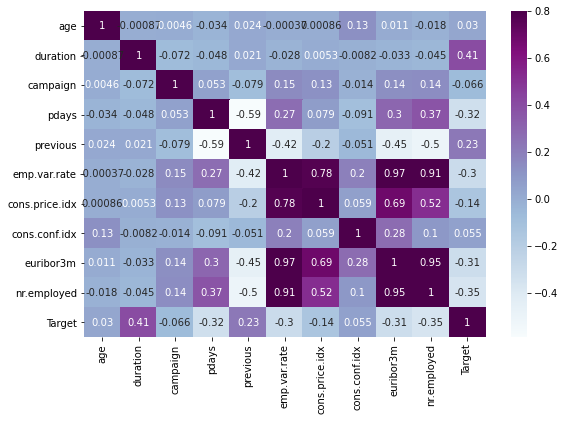

In [29]:
#creating a heatmap of the numerical variables and the target
matrix = data.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, cmap='BuPu', annot=True)

In [24]:
#dropping the Target column
data=data.drop('Target', axis=1)

In [25]:
data.shape

(41188, 21)

#### Insights

The last contact duration highly has a positive correlation with the target. 

The previous number of contacts before this campaign also has a positive correlation with the target

The number of employees indicator and the euribor 3 month rate have a negative correlation with the target

The employment variation rate, the consumer price index, the euribor 3 month rate and the number of employees are highly correlated. 